Name: Ariana Baker

Course Number: MSBD 566

Date: 09/18/2025

Honor Statement: I pledge my honor that I have neither given nor received any unauthorized aid on this assignment. I have read and understand both the policy and the instructions described in the given assignment.

## **Air Quality Index (AQI) Problem**

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:

|**Pollen Count** |**Pollen Level**|
|:------------:|:-------------|
| 0.0 to 2.4   | Low          |
| 2.5 to 4.8   | Low - Medium |
| 4.9 to 7.2   | Medium       |
| 7.3 to 9.6   | Medium - High|
| 9.7 to 12.0  | High         |



Source:  
1. https://data.nashville.gov/datasets/Nashville::air-quality-and-pollen-count/about
2. https://www.nashville.gov/departments/health/environmental-health/air-pollutioncontrol/daily-aqi-and-pollen-count

# **Coding**

In [2]:
# Load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading Data
data = pd.read_csv('/content/drive/MyDrive/MSBD 566 Predictive Modeling /Lecture 4/Air_Quality_and_Pollen_Count.csv')
display(data.head())

# Cleaning Data
# Put the ReportDateTime column into datetime format
cleaned_data = data.copy()
cleaned_data['ReportDateTime'] = pd.to_datetime(cleaned_data['ReportDateTime'])

print("\n\nCleaned Data:")
display(cleaned_data.head())

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025/04/04 05:00:00+00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025/04/03 05:00:00+00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025/04/02 05:00:00+00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025/04/01 05:00:00+00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025/03/31 05:00:00+00




Cleaned Data:


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025-04-04 05:00:00+00:00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025-04-03 05:00:00+00:00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025-04-02 05:00:00+00:00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025-04-01 05:00:00+00:00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025-03-31 05:00:00+00:00


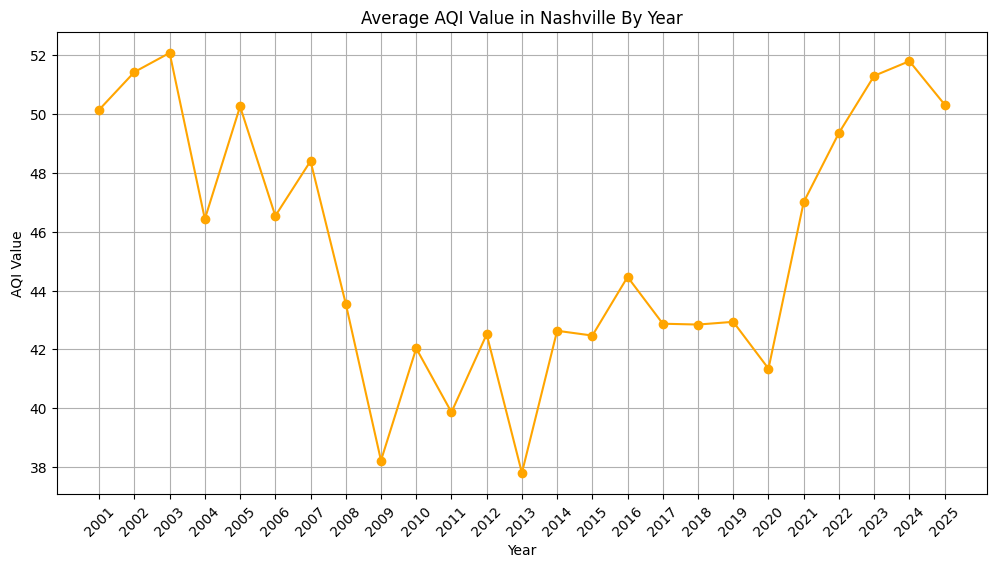



Average AQI Value by Year:


,ReportDateTime,AQI
0,2001,50.155378
1,2002,51.437008
2,2003,52.087766
3,2004,46.435616
4,2005,50.267030
5,2006,46.540984
6,2007,48.407609
7,2008,43.552279
8,2009,38.217391
9,2010,42.035422


In [5]:
# Plot the Average AQI by Year
## Find the Average AQI value each year
avg_aqi = cleaned_data.groupby(cleaned_data['ReportDateTime'].dt.year)['AQI'].mean().reset_index()

plt.figure(figsize = (12, 6))
ax = avg_aqi.set_index('ReportDateTime')['AQI'].plot(color = 'orange', marker = 'o')
ax.set_xticks(avg_aqi['ReportDateTime'].values)
ax.set_xticklabels(avg_aqi['ReportDateTime'].values, rotation = 45)
plt.title('Average AQI Value in Nashville By Year')
plt.xlabel('Year')
plt.ylabel('AQI Value')
plt.grid(True)
plt.show()

print("\n\nAverage AQI Value by Year:")
display(avg_aqi)


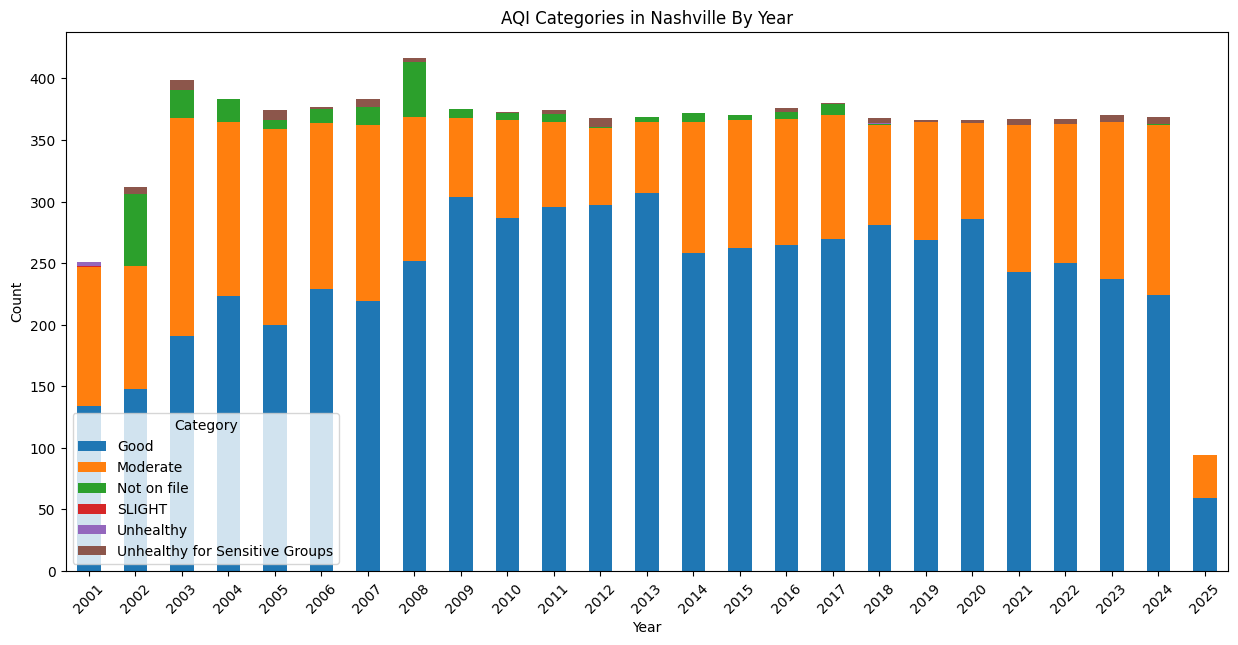

In [6]:
# Plot the AQI Categories by Year (Stacked Bar Graph)
## Find the count of each AQI category each year
count_cat = cleaned_data.groupby(cleaned_data['ReportDateTime'].dt.year)['Category'].value_counts().unstack().fillna(0)

count_cat.plot(kind = 'bar', stacked = True, figsize = (15, 7))
plt.title('AQI Categories in Nashville By Year')
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.legend(title = 'Category')
plt.show()

**Question 1A.** How many times has the AQI been recorded above 120?

Answer: 14 times

In [7]:
aqi_above_120 = cleaned_data[cleaned_data['AQI'] > 120]
print(f"Count: {aqi_above_120.shape[0]}")

print("\n\nInstances of AQI Reported Above 120:")
display(aqi_above_120)

Count: 14


Instances of AQI Reported Above 120:


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
1754,1755,123.0,Unhealthy for Sensitive Groups,PM2.5,3.0,Grass,Slight,2020-06-27 05:00:00+00:00
2507,2508,151.0,Unhealthy,Ozone 8-hr,5.0,Grass,Juniper,2018-06-09 05:00:00+00:00
2836,2837,132.0,Unhealthy for Sensitive Groups,Ozone 8-hr,3.0,Grass,Ragweed,2017-07-22 05:00:00+00:00
3678,3679,140.0,Unhealthy for Sensitive Groups,Ozone 8-hr,1.0,Grass,Slight,2012-08-09 05:00:00+00:00
3718,3719,145.0,Unhealthy for Sensitive Groups,Ozone 8-hr,NaN,NaN,Not on file,2012-06-30 05:00:00+00:00
3719,3720,124.0,Unhealthy for Sensitive Groups,Ozone 8-hr,2.0,Grass,Slight,2012-06-29 05:00:00+00:00
4238,4239,125.0,Unhealthy for Sensitive Groups,Ozone 8-hr,3.0,Grass,Slight,2016-06-26 05:00:00+00:00
4253,4254,122.0,Unhealthy for Sensitive Groups,Ozone 8-hr,5.0,Grass,Juniper,2016-06-11 05:00:00+00:00
5085,5086,124.0,Unhealthy for Sensitive Groups,Ozone 8-hr,8.0,Grass,Moderate,2011-08-03 05:00:00+00:00
6759,6760,140.0,Unhealthy for Sensitive Groups,Ozone 8-hr,1.0,Grass,Slight,2007-08-16 05:00:00+00:00


**Question 1B.** When did the Air Quality Index Category become unhealthy?

Answer: There were 4 instances in total of the Air Quality Index reaching 'Unhealthy' status, with three occurences during the summer of 2001 and one occurence in the summer of 2018.

In [8]:
unhealthy_aqi = cleaned_data[cleaned_data['Category'] == 'Unhealthy']
print("\n\nInstances of AQI Reported as 'Unhealthy':")
display(unhealthy_aqi)



Instances of AQI Reported as 'Unhealthy':


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
2507,2508,151.0,Unhealthy,Ozone 8-hr,5.0,Grass,Juniper,2018-06-09 05:00:00+00:00
8778,8779,132.0,Unhealthy,Ozone 8-hr,5.0,Grass,Slight,2001-07-24 05:00:00+00:00
8786,8787,105.0,Unhealthy,PM2.5,8.0,Grass,Moderate,2001-07-12 05:00:00+00:00
8800,8801,122.0,Unhealthy,Ozone 8-hr,3.0,Grass,Slight,2001-06-21 05:00:00+00:00


**Question 2.** Which pollen type occurs the most?

Answer: Grass is the most occuring pollen type in Nashville, TN.

In [9]:
nashville_pollen = cleaned_data['PollenType'].value_counts().reset_index()
nashville_pollen.columns = ['PollenType', 'Count']

print("\n\nCount of Each Pollen Type Occurence:")
print(nashville_pollen)



Count of Each Pollen Type Occurence:
   PollenType  Count
0       Grass   2330
1     Ragweed    603
2       Cedar    405
3         Elm    398
4       Alder    291
5     Juniper    235
6       Birch    181
7       Maple    132
8     Hickory     88
9         Oak     15
10       Pine      3
11   Mulberry      2
12  Goldenrod      1
13     Poplar      1
14        Ash      1
15  Hackberry      1


**Question 3.** Based on this data, do you think Nashville is a city that is comfortable to live? Why? Refer to air quality and pollen only.

Answer: In the context of the Air Quality Index (AQI) and Pollen Count, Nashville could generally be considered a comfortable city to live in for the average person. Over the years, majority of the daily AQI measurements were categorized as 'Good' or 'Moderate'. Between 2003 and 2009, there was a decreasing trend in average AQI levels, followed by a moderately stable trend until 2020, when the AQI levels sharply rose year-by-year. Even though there are instances of the AQI reaching unhealthy levels, those instances are minimal in number and infrequent.Pollen count data shows a consistent downward trend in the average yearly pollen count since 2013, which shows environmental improvements over time. However, AQI and pollen data analyis does not negate general seasonal changes that are challenging for sensitive populations.

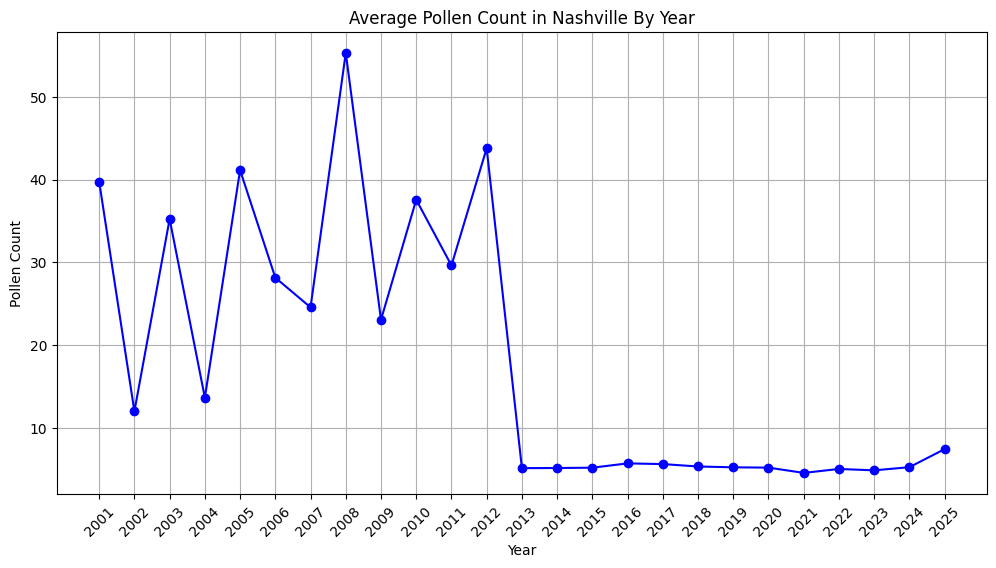



Average Pollen Count by Year:


,ReportDateTime,PollenCount
0,2001,39.748538
1,2002,12.000000
2,2003,35.234286
3,2004,13.644444
4,2005,41.137143
5,2006,28.146199
6,2007,24.560000
7,2008,55.298246
8,2009,23.057803
9,2010,37.558140


In [10]:
# Average Pollen Count By Year
avg_pollen_count = cleaned_data.groupby(cleaned_data['ReportDateTime'].dt.year)['PollenCount'].mean().reset_index()
plt.figure(figsize = (12, 6))
ax = avg_pollen_count.set_index('ReportDateTime')['PollenCount'].plot(color = 'blue', marker = 'o')
ax.set_xticks(avg_pollen_count['ReportDateTime'].values)
ax.set_xticklabels(avg_pollen_count['ReportDateTime'].values, rotation = 45)
plt.title('Average Pollen Count in Nashville By Year')
plt.xlabel('Year')
plt.ylabel('Pollen Count')
plt.grid(True)
plt.show()

print("\n\nAverage Pollen Count by Year:")
display(avg_pollen_count)


**Question 4**: Compare the manual approach versus a vectorized appproach to find the mean of AQI for each Air Quality Category. Compare the time difference between the two approaches and evaluate.

Answer: The vectorized method computes a simple calculation to achieve the mean results, while the manual approach utitlizes a for loop that allows the code to run repeatedly through each category. Both approaches produced the same mean AQI results, as seen by the 0.0 calculated difference below. However, there was a timing difference of 0.009 seconds, with the manual approach took slightly longer due to the repetitive nature of the for loop process.

Manual Approach:

In [32]:
# Manual approach to find the mean of AQI for each category
man_time_start = time.time()

for cat in cleaned_data['Category'].unique():
  aqi_data = cleaned_data[cleaned_data['Category'] == cat]
  mean_aqi = aqi_data['AQI'].mean()
  print(f"{cat}: {mean_aqi}")

man_time_end = time.time()
man_time_taken = man_time_end - man_time_start

print(f"Time taken for Manual Approach: {man_time_taken} seconds.")

Good: 36.966282757469536
Moderate: 62.240839694656486
Not on file: nan
Unhealthy for Sensitive Groups: 110.07894736842105
Unhealthy: 127.5
SLIGHT: 60.0
Time taken for Manual Approach: 0.013422012329101562 seconds.


Vectorized Approach:

In [33]:
# Vectorized approach to find the mean of AQI for each category

vec_time_start = time.time()

aqi_cat_mean = cleaned_data.groupby('Category')['AQI'].mean()
print(aqi_cat_mean)

vec_time_end = time.time()
vec_time_taken = vec_time_end - vec_time_start

print(f"Time  for Vectorized Approach: {vec_time_taken} seconds.")

Category
Good                               36.966283
Moderate                           62.240840
Not on file                              NaN
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
Name: AQI, dtype: float64
Time  for Vectorized Approach: 0.00400996208190918 seconds.


In [34]:
# Find difference between mean AQI values for Manual and Vectorized Approach
print(f"Difference between Manual and Vectorized Approach:{aqi_cat_mean - mean_cat}")

Difference between Manual and Vectorized Approach:Good                              0.0
Moderate                          0.0
Not on file                       NaN
SLIGHT                            0.0
Unhealthy                         0.0
Unhealthy for Sensitive Groups    0.0
dtype: float64


Timing Comparison:

In [35]:
# Compare difference between Manual and Vectorized Approach
print(f"Time difference between Manual and Vectorized Approach: {man_time_taken - vec_time_taken} seconds.")

Time difference between Manual and Vectorized Approach: 0.009412050247192383 seconds.
